In [65]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)

#read in the data
df = pd.read_csv(r'C:\Users\J74307\Documents\Personal Proj\Movies\movies.csv')

In [66]:
#missing data?
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

#changing datatypes for columns
df.dtypes
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')



budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [67]:
#creating correct year column
df['year_correct'] = df['released'].astype('str').str[0:4]

df = df.sort_values(by=['gross'], inplace = False, ascending = False)

#drop duplicates
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


<function matplotlib.pyplot.show(close=None, block=None)>

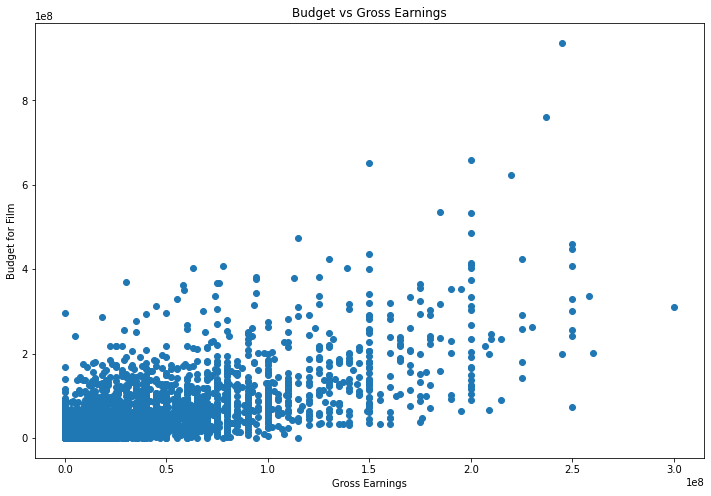

In [68]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show


In [69]:
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

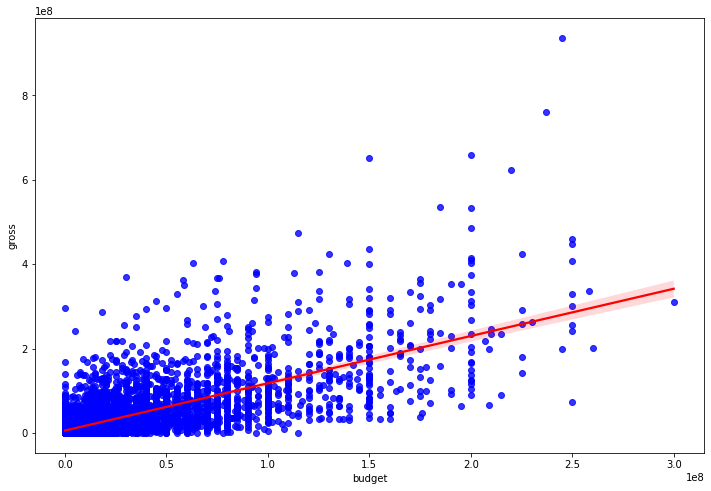

In [70]:
#plot budget vs gross using seaborn
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})

<function matplotlib.pyplot.show(close=None, block=None)>

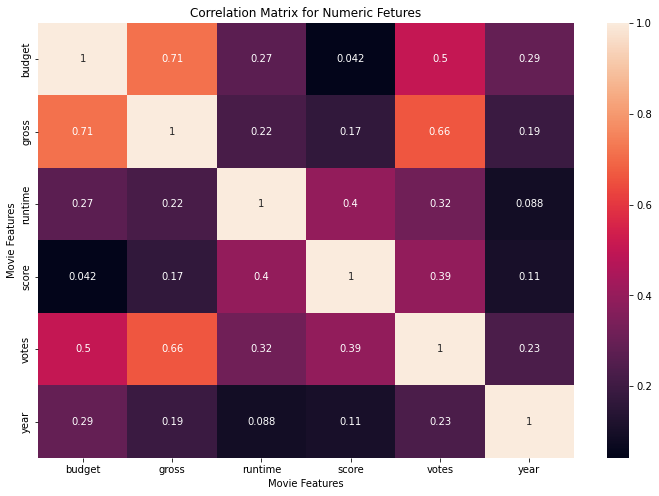

In [71]:
correlation_matrix = df.corr()
#high correlation between budget and gross
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Fetures')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [72]:
#categorizing nonnumeric fields in order to add them to the correlation matrix
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,2171,35,2071,0,547,2577,8,2059,104,7.2,748,16609,2981,2012,27
5699,0,1262,53,2385,4,542,5204,6,1977,89,6.2,1335,9018,2903,2011,26
6066,0,631,54,2484,5,441,2459,8,2125,106,5.7,1047,21070,2901,2013,28
2594,15000000,764,54,883,4,309,6257,7,895,84,5.7,2459,5034,217,1997,11


<function matplotlib.pyplot.show(close=None, block=None)>

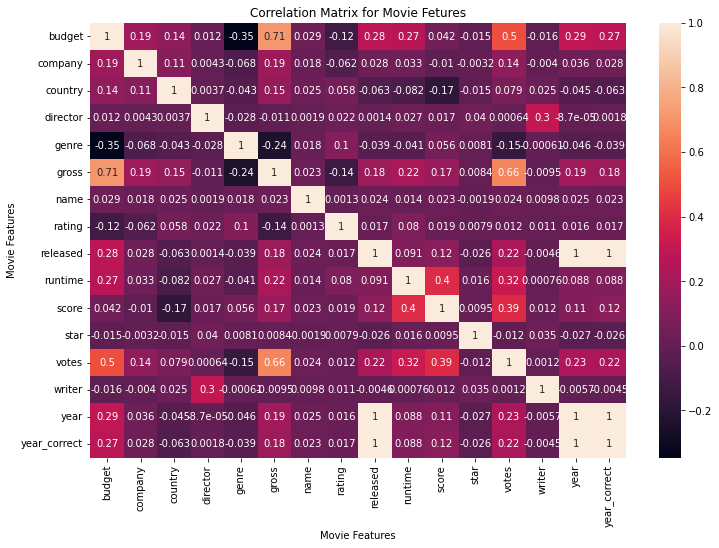

In [73]:
correlation_matrix = df_numerized.corr()
#high correlation between budget and gross
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Movie Fetures')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [74]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
                                ...   
year_correct  star           -0.026052
              votes           0.220797
              writer         -0.004546
              year            0.996229
              year_correct    1.000000
Length: 256, dtype: float64

In [75]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr
#votes and budget have the highest correlation to gross earnings
#company surprisingly has low correlation

votes         budget          0.503924
budget        votes           0.503924
votes         gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
released      year            0.996187
year          released        0.996187
year_correct  year            0.996229
year          year_correct    0.996229
year_correct  released        0.999389
released      year_correct    0.999389
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    